## Class-based approach
https://aquaulb.github.io/book_solving_pde_mooc/solving_pde_mooc/notebooks/05_IterativeMethods/05_03_Boosting_Python.html <br> <br>

In [10]:
import os
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import swan
from importlib import reload
reload(swan)

# load input data
wd = os.path.join('..')
datadir = os.path.join(wd, "data_temp")
u10 = np.load(os.path.join(datadir, "speed.npz"))['array']
theta = np.load(os.path.join(datadir, "direction.npz"))['array']
bathy = np.load(os.path.join(datadir, "bathymetry.npz"))['array']
dx = np.load(os.path.join(datadir, "bathymetry.npz"))['mesh'].item()

In [13]:
T = 1000
dt = 1

swan_model = swan.SWAN(bathy, u10, theta, dx)
swan_model.check_sigma_instability()
swan_model.setup_solution_matrices()
swan_model.solve_for_swh(T, dt)
swan_model.solve_for_action_density(T, dt)

Ratio is r = 6.25. Instabilities may arise if r >> 1. See SWAN Technical Documentation Cycle III v40.51 for details.


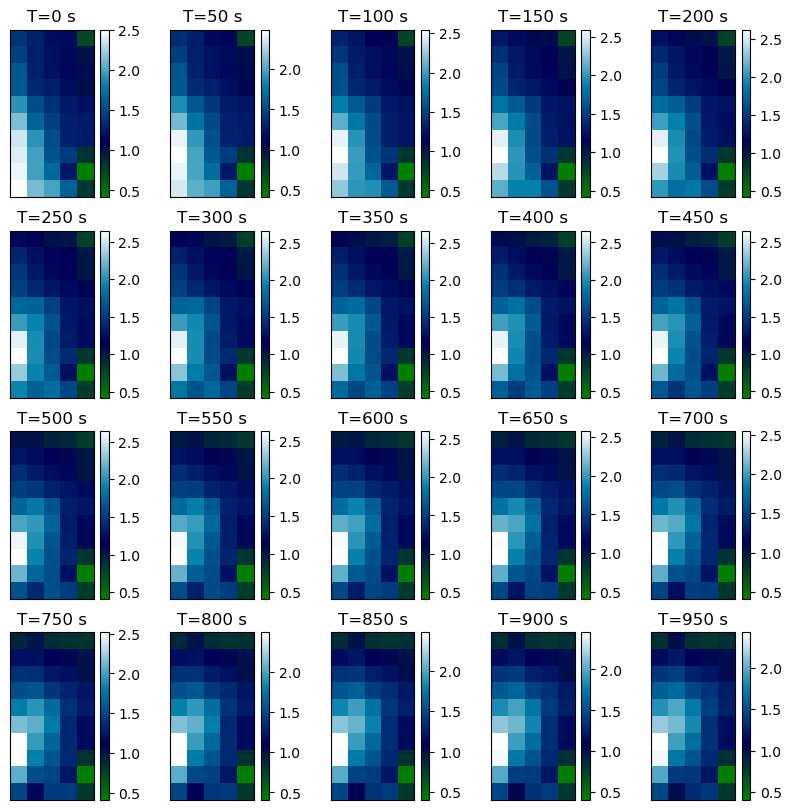

In [14]:
import numpy.ma as ma

fig, axs = plt.subplots(4, 5, figsize=(10, 10))
axs = axs.ravel()
vmin = -1

i = 0
for t in range(T):
    if t % int(T / 20) == 0:
        swh = ma.array(swan_model.swh[t], mask=swan_model.land)
        im = axs[i].imshow(swh, cmap='ocean')
        plt.colorbar(im)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title("T={} s".format((t * dt)))
        i += 1

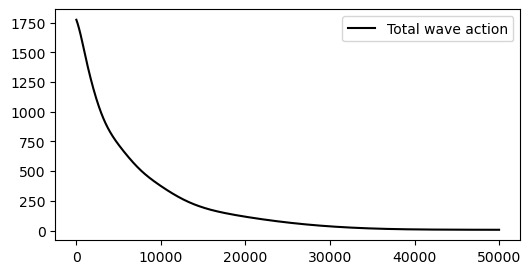

In [18]:
fig, axs = plt.subplots(figsize=(6,3))

total_N = [N.sum() for N in swan_model.N]
axs.plot(range(T), total_N, color='k', label='Total wave action')
axs.legend();

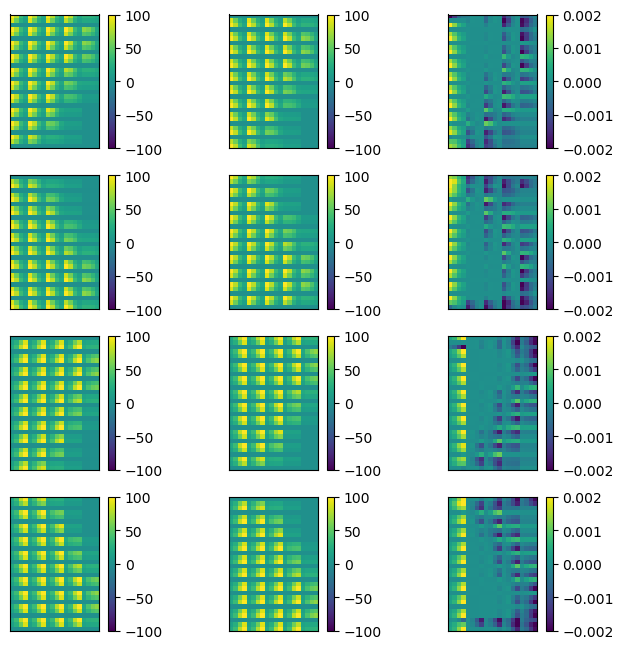

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(8, 8))

for i in range(4):
    ax = axs[i, :]
    cx = swan.sweep_flip(swan_model.sweeps[i]['cx'], i)
    swan.flattened_heatmap(cx, swan_model.dims, ax=ax[0], vmin=-100, vmax=100)

    cy = swan.sweep_flip(swan_model.sweeps[i]['cy'], i)
    swan.flattened_heatmap(cy, swan_model.dims, ax=ax[1], vmin=-100, vmax=100)

    cθ = swan.sweep_flip(swan_model.sweeps[i]['cθ'], i)
    swan.flattened_heatmap(cθ, swan_model.dims, ax=ax[2], vmin=-.002, vmax=.002)
    
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])